In [1]:
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.linear_model import LinearRegression
import matplotlib.pylab as plt
plt.style.use ('ggplot')

In [2]:
pd.DataFrame()

""


In [3]:
ccpp = pd.read_csv("C:/Users/Andrean Georgiev/Downloads/CCPP_data.csv")





In [4]:
print(ccpp.head())

      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90


In [5]:
print(ccpp.tail())

         AT      V       AP     RH      PE
9563  16.65  49.69  1014.01  91.00  460.03
9564  13.19  39.18  1023.67  66.78  469.62
9565  31.32  74.33  1012.92  36.48  429.57
9566  24.48  69.45  1013.86  62.39  435.74
9567  21.60  62.52  1017.23  67.87  453.28


In [6]:
ccpp.sample(10)

,AT,V,AP,RH,PE
8051,9.59,40.11,1026.05,74.27,470.71
1730,33.01,69.88,1006.71,53.25,433.50
3480,21.46,46.63,1012.97,71.29,452.10
2729,15.67,41.10,1004.10,77.93,466.45
3903,17.53,50.66,1012.74,91.51,457.28
4875,11.72,40.35,1012.08,83.98,476.41
4155,31.49,73.50,1010.71,40.16,432.13
5324,19.39,60.10,1010.28,83.31,452.57
9146,26.37,69.84,1002.71,83.51,428.60
185,28.57,69.84,1003.57,66.55,433.24


In [7]:
ccpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [8]:
ccpp.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [9]:
ccpp.shape

(9568, 5)

In [10]:
type(ccpp.iloc[:5])

pandas.core.frame.DataFrame

In [11]:
ccpp.iloc[:5]

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [12]:
ccpp.iloc[:5, :5]

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [13]:
ccpp.iloc

In [14]:
ccpp.rank()

,AT,V,AP,RH,PE
0,3062.0,2418.0,9164.0,4369.0,6302.0
1,6895.5,6371.0,8303.5,1742.0,3468.0
2,95.5,738.5,4278.5,8805.5,9421.0
3,4958.0,5203.5,3088.5,5212.0,3919.5
4,1485.0,250.0,2460.0,9296.0,7959.5
...,...,...,...,...,...
9563,3600.0,4427.0,5539.5,8610.5,5866.0
9564,2267.5,599.5,9120.0,3043.5,7368.0
9565,9198.5,9194.0,4767.0,60.0,299.5
9566,6556.0,7938.0,5431.0,2234.0,1450.5


In [15]:
ccpp['rank'] = ccpp['AT'].rank(method='dense', ascending=False)

In [16]:
print(ccpp)

         AT      V       AP     RH      PE    rank
0     14.96  41.76  1024.07  73.17  463.26  1799.0
1     25.18  62.96  1020.04  59.08  444.37   814.0
2      5.11  39.40  1012.16  92.14  488.56  2696.0
3     20.86  57.32  1010.24  76.64  446.48  1237.0
4     10.82  37.50  1009.23  96.62  473.90  2199.0
...     ...    ...      ...    ...     ...     ...
9563  16.65  49.69  1014.01  91.00  460.03  1637.0
9564  13.19  39.18  1023.67  66.78  469.62  1971.0
9565  31.32  74.33  1012.92  36.48  429.57   213.0
9566  24.48  69.45  1013.86  62.39  435.74   884.0
9567  21.60  62.52  1017.23  67.87  453.28  1167.0

[9568 rows x 6 columns]


In [17]:
ccpp.iterrows

<bound method DataFrame.iterrows of          AT      V       AP     RH      PE    rank
0     14.96  41.76  1024.07  73.17  463.26  1799.0
1     25.18  62.96  1020.04  59.08  444.37   814.0
2      5.11  39.40  1012.16  92.14  488.56  2696.0
3     20.86  57.32  1010.24  76.64  446.48  1237.0
4     10.82  37.50  1009.23  96.62  473.90  2199.0
...     ...    ...      ...    ...     ...     ...
9563  16.65  49.69  1014.01  91.00  460.03  1637.0
9564  13.19  39.18  1023.67  66.78  469.62  1971.0
9565  31.32  74.33  1012.92  36.48  429.57   213.0
9566  24.48  69.45  1013.86  62.39  435.74   884.0
9567  21.60  62.52  1017.23  67.87  453.28  1167.0

[9568 rows x 6 columns]>

In [18]:
import numpy as np

In [19]:
ccpp['PE'].value_counts()

PE
468.80    9
442.78    8
434.01    8
447.06    8
440.26    7
         ..
458.13    1
429.72    1
478.74    1
466.41    1
469.62    1
Name: count, Length: 4836, dtype: int64

<Axes: ylabel='Frequency'>

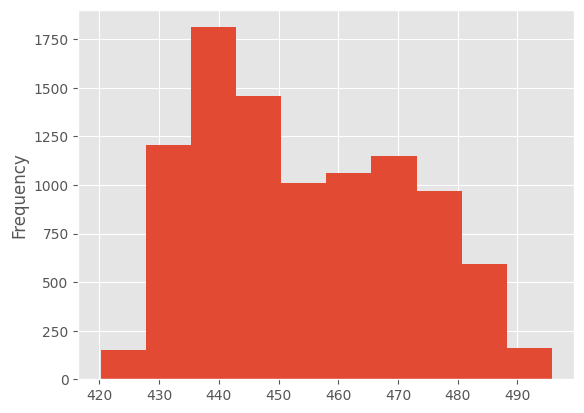

In [20]:
ccpp['PE'].plot(kind='hist')

<Axes: xlabel='PE', ylabel='AT'>

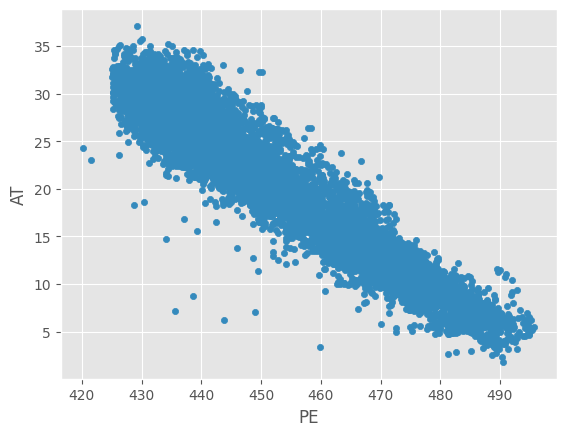

In [21]:
ccpp.plot(kind = 'scatter', x = 'PE', y = 'AT')

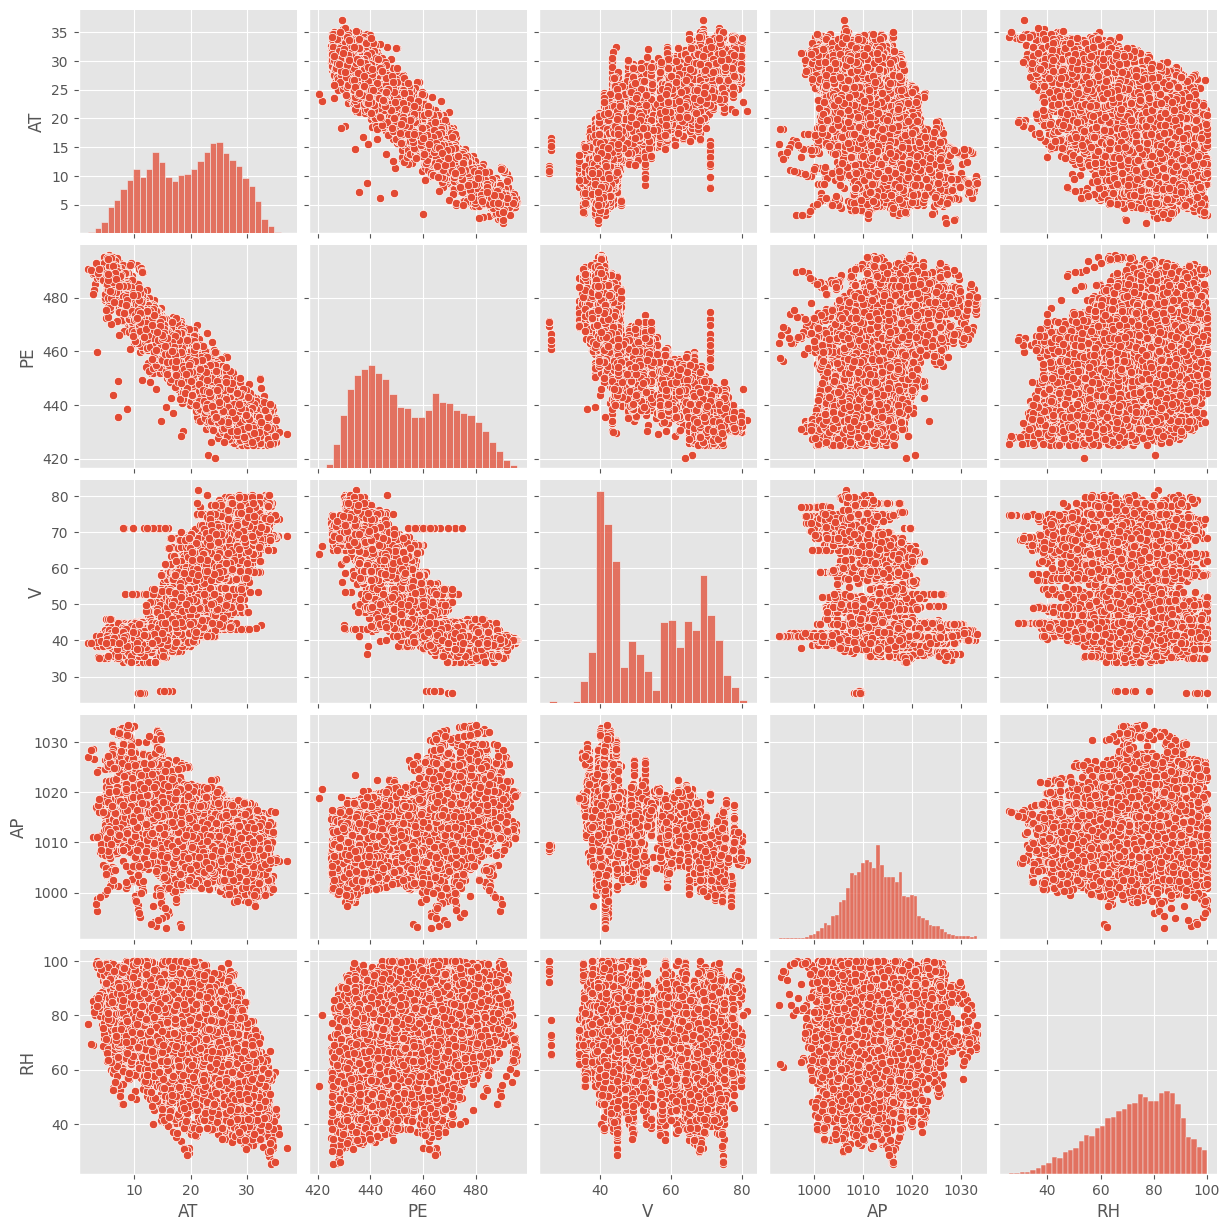

In [22]:
sns.pairplot(ccpp, vars = ['AT', 'PE', 'V', 'AP', 'RH'])
plt.show()

In [23]:
ccpp.corr()

,AT,V,AP,RH,PE,rank
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128,-0.999767
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780,-0.845643
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429,0.509247
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794,0.543063
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000,0.948007
rank,-0.999767,-0.845643,0.509247,0.543063,0.948007,1.000000


In [24]:
regr = LinearRegression()

In [25]:
x = ccpp[['AT', 'V']].copy()
y = ccpp[['PE']].copy()

guess = pd.DataFrame({'AT':[18,15, 10], 'V':[46,43,30]})

regr.fit(x,y)
regr.predict(guess)

array([[459.87426774],
       [465.96052501],
       [478.70017926]])

In [26]:
ccpp.head()

,AT,V,AP,RH,PE,rank
0,14.96,41.76,1024.07,73.17,463.26,1799.0
1,25.18,62.96,1020.04,59.08,444.37,814.0
2,5.11,39.40,1012.16,92.14,488.56,2696.0
3,20.86,57.32,1010.24,76.64,446.48,1237.0
4,10.82,37.50,1009.23,96.62,473.90,2199.0


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = ccpp[['AT','V']].copy()
y = ccpp.PE.copy()

X_train, X_test, y_train, y_test = train_test_split (X, y, random_state=1)
lm1 = LinearRegression().fit(X_train, y_train)
lm1_preds = lm1.predict(X_test)

print ("RMSE: ", np.sqrt(mean_squared_error(y_test, lm1_preds)))
print ("R^2: ", r2_score(y_test, lm1_preds))
                        

RMSE:  4.966908750661229
R^2:  0.9168791371397307


In [33]:
X = ccpp[['AT']].copy()
y = ccpp.PE.copy()

X_train, X_test, y_train, y_test = train_test_split (X, y, random_state=1)
lm2 = LinearRegression().fit(X_train, y_train)
lm2_preds = lm2.predict(X_test)

print ("RMSE: ", np.sqrt(mean_squared_error(y_test, lm2_preds)))
print ("R^2: ", r2_score(y_test, lm2_preds))

RMSE:  5.381593695619007
R^2:  0.9024202970245849


C:\Users\Andrean Georgiev\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


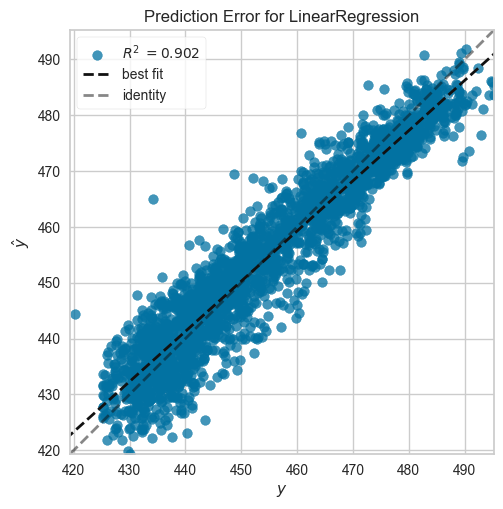

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [32]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

visualizer = PredictionError(lm2).fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [36]:
ccpp ['interaction'] = ccpp['AT'] * ccpp['V']

X = ccpp[['AT', 'V', 'interaction']].copy()
y = ccpp.PE.copy()

X_train, X_test, y_train, y_test = train_test_split (X, y, random_state=1)
lm3 = LinearRegression().fit(X_train, y_train)
lm3_preds = lm3.predict(X_test)

print ("RMSE: ", np.sqrt(mean_squared_error(y_test, lm3_preds)))
print ("R^2: ", r2_score(y_test, lm3_preds))



RMSE:  4.673133232926019
R^2:  0.9264209788030896


In [1]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Sample data
data = [[0, 0], [0, 0], [1, 1], [1, 1]]

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(data)

print(scaled_data)

[[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]
